In [1]:
import ROOT
import numpy as np
import os

Welcome to JupyROOT 6.22/06


In [7]:
def get_tfile_ttree(pion_pair,version):
    if version == "data":
        if pion_pair == [211,111]:
            filesuffix = "Fall2018_RGA_inbending_merged.root"
        elif pion_pair == [-211,111]:
            filesuffix = "Spring2019_RGA_outbending_merged.root"
    elif version == "MC":
        if pion_pair == [211,111]:
            filesuffix = "MC_RGA_inbending_merged.root"
        elif pion_pair == [-211,111]:
            filesuffix = "MC_RGA_outbending_merged.root"

    pid_str_1 = str(pion_pair[0]).replace("-211","piminus").replace("211","piplus").replace("111","pi0")
    pid_str_2 = str(pion_pair[1]).replace("-211","piminus").replace("211","piplus").replace("111","pi0")

    dihadron_str = f"{pid_str_1}_{pid_str_2}"

    tfile = ROOT.TFile(f"/volatile/clas12/users/gmat/clas12analysis.sidis.data/clas12_dihadrons/projects/pipi0_paper_RGA_only/data/{dihadron_str}/{filesuffix}")
    ttree = tfile.Get("dihadron")
    return tfile,ttree

# Machine Learning vs. No Machine Learning

In [8]:
colors = []
def col(R,G,B,A=0.7):
    CI = ROOT.TColor.GetFreeColorIndex()
    C = ROOT.TColor(CI , R/255., G/255. , B/255.,"",A)
    colors.append(C)
    return CI

In [9]:
pion_pair=[211,111]
version = "data"
tfile,ttree = get_tfile_ttree(pion_pair,version)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5 (Potential memory leak).
Info in <TCanvas::Print>: pdf file diphoton2.pdf has been created


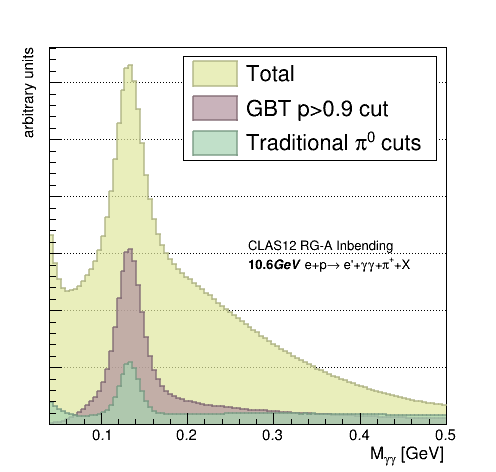

In [22]:
c=ROOT.TCanvas("c","c",500,500)
ROOT.gStyle.SetHistLineWidth(2)
#ROOT.gStyle.SetLegendBorderSize(0)
h1=ROOT.TH1F("h1",";M_{#gamma#gamma} [GeV];Counts",100,0.04,0.5); 
h2=ROOT.TH1F("h2",";Mdiphoton [GeV];Counts",100,0.04,0.5); 
h3=ROOT.TH1F("h3",";Mdiphoton [GeV];Counts",100,0.04,0.5); 
h4=ROOT.TH1F("h4",";Mdiphoton [GeV];Counts",100,0.04,0.5); 
h5=ROOT.TH1F("h5",";Mdiphoton [GeV];Counts",100,0.04,0.5);



ROOT.gStyle.SetHistLineWidth(2)

# Coloring
h1.SetLineColor(col(176,181,133))
h1.SetFillColor(col(225,232,159))

h2.SetLineColor(col(116,85,75))
h2.SetFillColor(col(173,121,113))

h3.SetLineColor(col(132,109,118))
h3.SetFillColor(col(179,148,160))

h4.SetLineColor(col(117,126,138))
h4.SetFillColor(col(161,183,187))

h5.SetLineColor(col(122,155,132))
h5.SetFillColor(col(168,213,179))

N=int(1e10)
isGoodEvent="z<0.95&&xF1>0&&xF2>0&&Mx>1.5&&P1>1.25"
ttree.Draw("M2>>h1",isGoodEvent,"hist",N)
ttree.Draw("M2>>h3","isGoodEventWithML","hist same",N)
ttree.Draw("M2>>h5","isGoodEventWithoutML","hist same",N)

h2.Scale(1/h1.Integral())
h3.Scale(1/h1.Integral())
h4.Scale(1/h1.Integral())
h5.Scale(1/h1.Integral())
h1.Scale(1/h1.Integral())

legend=ROOT.TLegend(0.37,0.66,0.88,0.88)
#legend=ROOT.TLegend(0.6,0.8,0.88,0.88)
legend.AddEntry(h1,"Total","f")
#legend.AddEntry(h2,"Background","f")
legend.AddEntry(h3,"GBT p>0.9 cut","f")
#legend.AddEntry(h4,"GBT p>0.9 Bkg","f")
legend.AddEntry(h5,"Traditional #pi^{0} cuts","f")
legend.Draw("same")

h1.GetYaxis().SetRangeUser(0,0.1)
h1.GetYaxis().SetNdivisions(508)
h1.GetYaxis().SetLabelSize(0)
h1.GetYaxis().SetTitle("arbitrary units")
h1.GetXaxis().SetTitleSize(0.04)
ROOT.gStyle.SetOptStat(0)
c.SetGridy(1)
ymax=0
for i in range(h1.GetNbinsX()):
    if(h1.GetBinContent(i+1)>ymax):
        ymax=h1.GetBinContent(i+1)
h1.GetYaxis().SetRangeUser(0,ymax*1.05)

latex=ROOT.TLatex()
latex.SetTextSize(0.03)
latex.SetTextFont(42)
latex.DrawLatexNDC(0.5,0.47,"CLAS12 RG-A Inbending")
latex.DrawLatexNDC(0.5,0.43,"#bf{10.6#it{GeV}} e+p#rightarrow e'+#gamma#gamma+#pi^{+}+X")

h1.GetXaxis().SetNdivisions(508)
c.RedrawAxis()
c.Draw()
c.SaveAs("diphoton2.pdf")

# Signal Peak

In [70]:
pion_pair=[211,111]
version = "MC"
tfile,ttree = get_tfile_ttree(pion_pair,version)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5 (Potential memory leak).


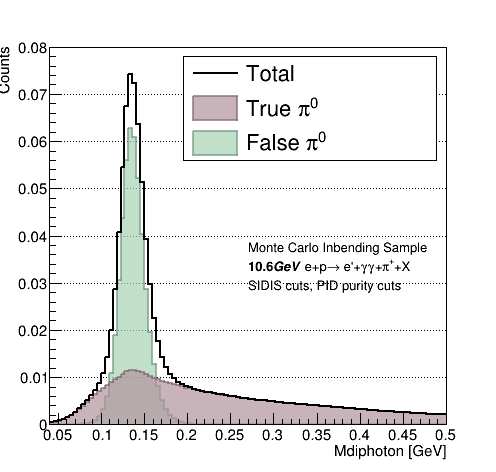

In [78]:
c=ROOT.TCanvas("c","c",500,500)
ROOT.gStyle.SetHistLineWidth(2)
#ROOT.gStyle.SetLegendBorderSize(0)
h1=ROOT.TH1F("h1",";M_{#gamma#gamma} [GeV];Counts",100,0.04,0.5); 
h2=ROOT.TH1F("h2",";Mdiphoton [GeV];Counts",100,0.04,0.5); 
h3=ROOT.TH1F("h3",";Mdiphoton [GeV];Counts",100,0.04,0.5); 
h4=ROOT.TH1F("h4",";Mdiphoton [GeV];Counts",100,0.04,0.5); 
h5=ROOT.TH1F("h5",";Mdiphoton [GeV];Counts",100,0.04,0.5);


ROOT.gStyle.SetHistLineWidth(2)

# Coloring
h1.SetLineColor(1)

h2.SetLineColor(col(116,85,75))
h2.SetFillColor(col(173,121,113))

h3.SetLineColor(col(132,109,118))
h3.SetFillColor(col(179,148,160))

h4.SetLineColor(col(117,126,138))
h4.SetFillColor(col(161,183,187))

h5.SetLineColor(col(122,155,132))
h5.SetFillColor(col(168,213,179))

ttree.Draw("M2>>h5","trueparentpid_2==111","hist")
ttree.Draw("M2>>h3","trueparentpid_2!=111","hist same")
ttree.Draw("M2>>h1","","hist same")

h2.Scale(1/h1.Integral())
h3.Scale(1/h1.Integral())
h4.Scale(1/h1.Integral())
h5.Scale(1/h1.Integral())
h1.Scale(1/h1.Integral())

legend=ROOT.TLegend(0.37,0.66,0.88,0.88)
#legend=ROOT.TLegend(0.6,0.8,0.88,0.88)
legend.AddEntry(h1,"Total","l")
#legend.AddEntry(h2,"Background","f")
legend.AddEntry(h3,"True #pi^{0}","f")
#legend.AddEntry(h4,"GBT p>0.9 Bkg","f")
legend.AddEntry(h5,"False #pi^{0}","f")
legend.Draw("same")

h5.GetYaxis().SetRangeUser(0,0.08)
h1.GetYaxis().SetNdivisions(508)
h1.GetYaxis().SetLabelSize(0)
h1.GetYaxis().SetTitle("arbitrary units")
h1.GetXaxis().SetTitleSize(0.04)
ROOT.gStyle.SetOptStat(0)
c.SetGridy(1)
ymax=0
for i in range(h1.GetNbinsX()):
    if(h1.GetBinContent(i+1)>ymax):
        ymax=h1.GetBinContent(i+1)
h1.GetYaxis().SetRangeUser(0,ymax*1.05)

latex=ROOT.TLatex()
latex.SetTextSize(0.03)
latex.SetTextFont(42)
latex.DrawLatexNDC(0.5,0.465,"Monte Carlo Inbending Sample")
latex.DrawLatexNDC(0.5,0.425,"#bf{10.6#it{GeV}} e+p#rightarrow e'+#gamma#gamma+#pi^{+}+X")
latex.DrawLatexNDC(0.5,0.385,"SIDIS cuts, PID purity cuts")

h1.GetXaxis().SetNdivisions(508)
c.RedrawAxis()
c.Draw()

# Plotting Fit Functions

In [12]:
def par_str(val,err):
    num_sig_digits = int(round(-np.log10(err)))+1
    rounded_val = f'%.{num_sig_digits}f'%val#round(val, num_sig_digits)
    rounded_err = round(err, num_sig_digits)
    v = rounded_val
    e = rounded_err*np.round(10**num_sig_digits)
    return f"{v}({int(e)})"

In [80]:
pion_pair=[211,111]
version = "data"
tfile,ttree = get_tfile_ttree(pion_pair,version)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 


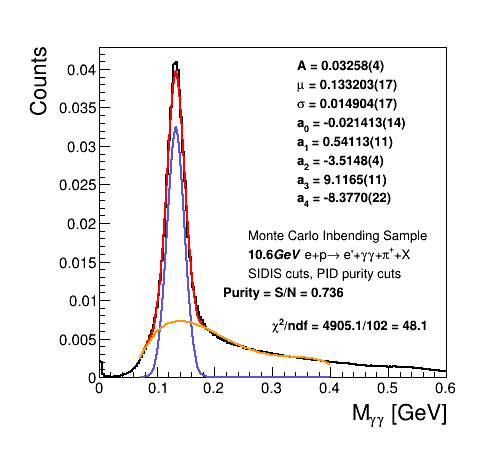

In [82]:
# Predefine the settings for your plot
canvas_size = 500
nbins = 200
range_low = 0
range_high = 0.6
fit_range = (0.07, 0.4)
fit_limits = [(0.129, 0.135), (0.0001, 0.2)]
gaus_color = 2
signal_color = 9
bkg_color = ROOT.kOrange-3
text_font = 42
text_size = 0.03
version = "MC"  # Change to "Data" for data
mu_param = 1
sigma_param = 2

# Create canvas and histogram
c = ROOT.TCanvas("c", "c", canvas_size, canvas_size)
h = ROOT.TH1F("h", "", nbins, range_low, range_high)

# Draw your tree variable to the histogram
ttree.Draw("M2>>h", "", "")

# Set the line color and width
h.SetLineColor(1)
h.SetLineWidth(2)

# Set the style options
ROOT.gStyle.SetOptStat(0)
ROOT.gPad.SetLeftMargin(0.2)
ROOT.gPad.SetBottomMargin(0.2)

# Set title sizes and labels for both axes
h.GetXaxis().SetTitleSize(0.05)
h.GetXaxis().SetTitle("M_{#gamma#gamma} [GeV]")
h.GetYaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitle("Counts")

# Normalize the histogram
h.Scale(1/h.Integral())

# Draw the histogram
h.Draw("hist")

# Draw additional information on the plot
latex = ROOT.TLatex()
latex.SetTextSize(text_size)
latex.SetTextFont(text_font)
latex.DrawLatexNDC(0.5,0.49, "Monte Carlo Inbending Sample" if version=="MC" else "Fall 2018 Inbending Sample")
latex.DrawLatexNDC(0.5,0.45,"#bf{10.6#it{GeV}} e+p#rightarrow e'+#gamma#gamma+#pi^{+}+X")
latex.DrawLatexNDC(0.5,0.41,"SIDIS cuts, PID purity cuts")

# Fit the histogram with a combination of a Gaussian and a fourth degree polynomial
tf1 = ROOT.TF1("tf1", "[0]*TMath::Gaus(x,[1],[2]) + [3] + [4]*x + [5]*x*x + [6]*x*x*x + [7]*x*x*x*x", *fit_range)
tf1.SetParLimits(mu_param, *fit_limits[0])
tf1.SetParLimits(sigma_param, *fit_limits[1])
h.Fit("tf1", "RQ")

# Draw the fitted function
tf1.SetLineColor(gaus_color)
tf1.Draw("same")

# Create and draw functions representing signal and background
tf1_signal = ROOT.TF1("tf1_signal", f"{tf1.GetParameter(0)}*TMath::Gaus(x,{tf1.GetParameter(1)},{tf1.GetParameter(2)})", *fit_range)
tf1_signal.SetLineColor(signal_color)
tf1_signal.Draw("same")

tf1_bkg = ROOT.TF1("tf1_bkg", f"{tf1.GetParameter(3)} + {tf1.GetParameter(4)}*x + {tf1.GetParameter(5)}*x*x + {tf1.GetParameter(6)}*x*x*x + {tf1.GetParameter(7)}*x*x*x*x", *fit_range)
tf1_bkg.SetLineColor(bkg_color)
tf1_bkg.Draw("same")

# Add fit parameters to the plot
latex2 = ROOT.TLatex()
latex2.SetTextSize(text_size)
ymax = 0.85
dy = 0.04
parNames = ["A", "#mu", "#sigma", "a_{0}", "a_{1}", "a_{2}", "a_{3}", "a_{4}"]
for i in range(8):
    latex2.DrawLatexNDC(0.6, ymax-i*dy, parNames[i]+" = {} ".format(par_str(tf1.GetParameter(i),tf1.GetParError(i))))

# Calculate and display signal purity and fit quality
mu = tf1.GetParameter(mu_param)
sigma = tf1.GetParameter(sigma_param)
int_s = tf1_signal.Integral(mu-2*sigma, mu+2*sigma)
int_b = tf1_bkg.Integral(mu-2*sigma, mu+2*sigma)
latex2.DrawLatexNDC(0.45, 0.37, "Purity = S/N = {}".format(np.round(int_s/(int_s+int_b), 3)))
latex2.DrawLatexNDC(0.55, 0.3, "#chi^{2}/ndf = "+f"{np.round(tf1.GetChisquare(), 1)}/{tf1.GetNDF()} = {np.round(tf1.GetChisquare()/tf1.GetNDF(), 1)}")

# Draw the canvas
c.Draw()
